In [1]:
import json
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import math

In [2]:
dir = "current-best-v3"

In [6]:
path = f'../../output/weights/{dir}/evaluate/metrics.json'
#path = "C:/Users/elias/OneDrive/Desktop/log.json"

with open(path, 'r') as f:
    data = json.load(f)

games = data["games"]

print(f"Games: {games}")

Games: 1000


In [8]:
def plot_top_action(data, action, games):
    counter = 0
    dices = []

    scaler = 1

    for a in data["actions"]:
        if a["action"] == action:
            counter += 1

            if action == "FINISH_ONES":
                dices.append(int(a["points"] / 1))
                scaler = 1
            if action == "FINISH_TWOS":
                dices.append(int(a["points"] / 2))
                scaler = 2
            if action == "FINISH_THREES":
                dices.append(int(a["points"] / 3))
                scaler = 3
            if action == "FINISH_FOURS":
                dices.append(int(a["points"] / 4))
                scaler = 4
            if action == "FINISH_FIVES":
                dices.append(int(a["points"] / 5))
                scaler = 5
            if action == "FINISH_SIXES":
                dices.append(int(a["points"] / 6))
                scaler = 6
    
    dices += [0] * (games - counter)
    # print(dices)
    plt.hist(dices, bins=5)
    plt.title(action)
    plt.show()

    print(f"Min: {min(dices)}")
    print(f"Max: {max(dices)} (points: {max(dices) * scaler})")

In [36]:
from tabulate import tabulate

def plot_bottom_action_binary(data, games):

    actions = ["FINISH_ONES", "FINISH_TWOS", "FINISH_THREES", "FINISH_FOURS", "FINISH_FIVES", "FINISH_SIXES", "FINISH_THREE_TIMES", "FINISH_FOUR_TIMES", "FINISH_FULL_HOUSE", "FINISH_SMALL_STREET", "FINISH_LARGE_STREET", "FINISH_KNIFE", "FINISH_CHANCE"]
    
    table = []

    for action in actions:

        counter = 0

        for a in data["actions"]:
            if a["action"] == action:
                counter += 1
                
        table.append([action, counter, games - counter, str(round(counter / games * 100)) + "%"])
    
    print (tabulate(table, headers=["Action", "Used", "Not used", "%"], tablefmt=))
    

In [37]:
plot_bottom_action_binary(data, games)

Action                 Used    Not used  %
-------------------  ------  ----------  ----
FINISH_ONES             835         165  84%
FINISH_TWOS             876         124  88%
FINISH_THREES           847         153  85%
FINISH_FOURS            800         200  80%
FINISH_FIVES            822         178  82%
FINISH_SIXES            765         235  76%
FINISH_THREE_TIMES      796         204  80%
FINISH_FOUR_TIMES       426         574  43%
FINISH_FULL_HOUSE       728         272  73%
FINISH_SMALL_STREET     925          75  92%
FINISH_LARGE_STREET     672         328  67%
FINISH_KNIFE              0        1000  0%
FINISH_CHANCE          1001          -1  100%


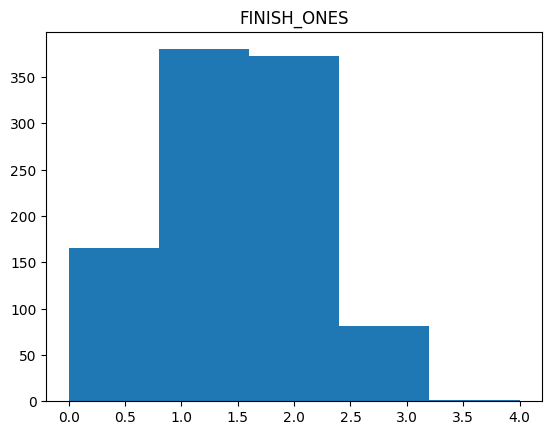

Min: 0
Max: 4 (points: 4)


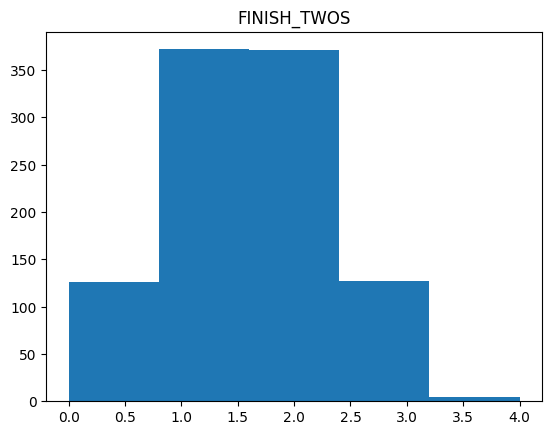

Min: 0
Max: 4 (points: 8)


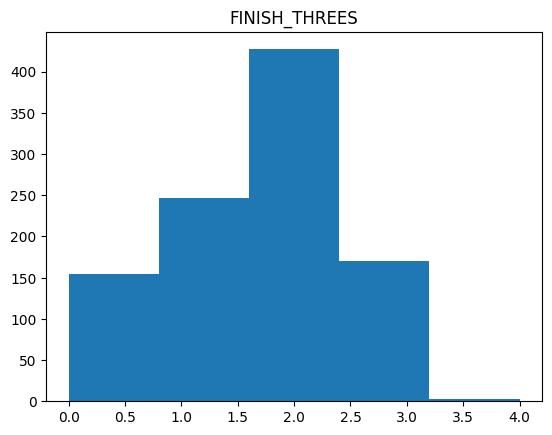

Min: 0
Max: 4 (points: 12)


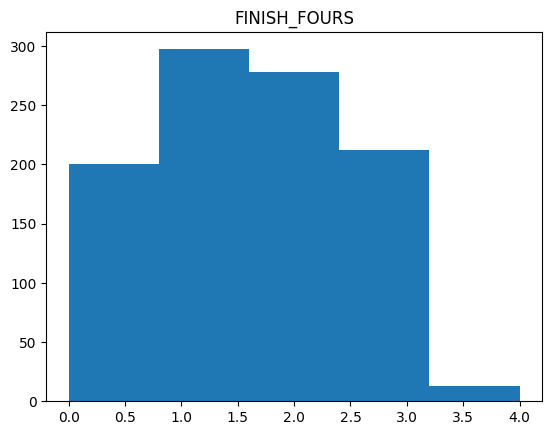

Min: 0
Max: 4 (points: 16)


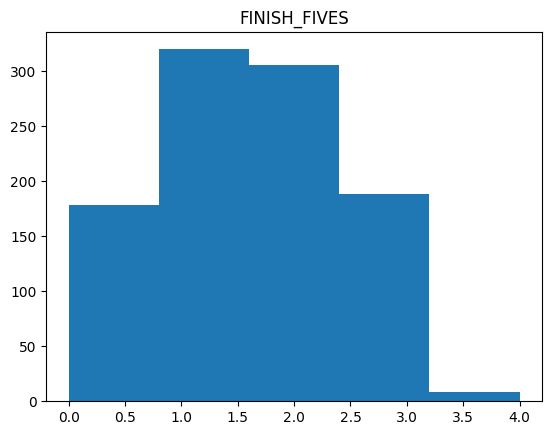

Min: 0
Max: 4 (points: 20)


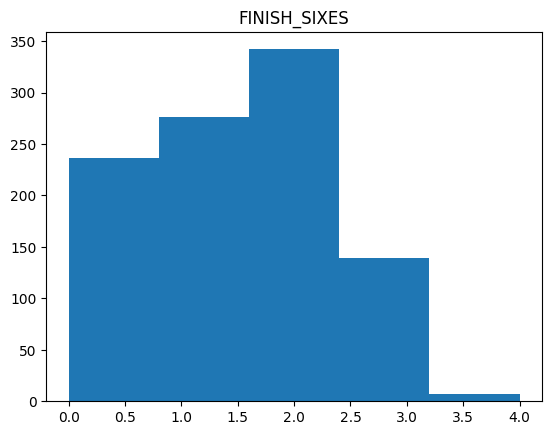

Min: 0
Max: 4 (points: 24)


In [24]:
plot_top_action(data, "FINISH_ONES", games)
plot_top_action(data, "FINISH_TWOS", games)
plot_top_action(data, "FINISH_THREES", games)
plot_top_action(data, "FINISH_FOURS", games)
plot_top_action(data, "FINISH_FIVES", games)
plot_top_action(data, "FINISH_SIXES", games)